In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# 1. Load each “experiment” and “geometry” pair
volumes = {}
for i in [1, 2, 3]:
    exp_path = rf"C:\Users\91939\OneDrive\Documents\my work\DATA SCIENCE-AI&ML\aerospace&data analytics\volume{i}_exp.csv"
    geom_path = rf"C:\Users\91939\OneDrive\Documents\my work\DATA SCIENCE-AI&ML\aerospace&data analytics\volume{i}_geom.csv"
    
    exp = pd.read_csv(exp_path)
    geom = pd.read_csv(geom_path)
    
    # Tag with volume number
    exp["volume"] = i
    geom["volume"] = i
    volumes[i] = {"exp": exp, "geom": geom}


In [2]:
# Combine all experiment data
exp_combined = pd.concat([volumes[i]["exp"] for i in volumes], ignore_index=True)

# Combine all geometry data
geom_combined = pd.concat([volumes[i]["geom"] for i in volumes], ignore_index=True)


In [3]:
import pandas as pd

# ─── 1. COMBINE DATA ───────────────────────────────────────────────────────
# Assuming you already loaded and concatenated the data from all volumes
# and have merged it into exp_combined and geom_combined

# Merge experiment and geometry data side by side (as previously shown)
merged_df = pd.concat(
    [exp_combined.reset_index(drop=True), geom_combined.reset_index(drop=True)],
    axis=1
)

# ─── 2. CLEAN COLUMN NAMES ─────────────────────────────────────────────────
# Clean column names to be more readable and consistent
merged_df.columns = (
    merged_df.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(" ", "_")  # Replace spaces with underscores
    .str.replace(r"[()]", "", regex=True)  # Remove parentheses
)

# ─── 3. VERIFY CLEANED DATA ────────────────────────────────────────────────
# Display the first few rows of the cleaned data to verify
print("\nFirst few rows of the cleaned data:")
print(merged_df.head())

# ─── 4. CHECK COLUMN NAMES ─────────────────────────────────────────────────
print("\nColumn names after cleaning:")
print(merged_df.columns.tolist())

# ─── 5. CHECK DATA INFO ───────────────────────────────────────────────────
print("\nDataframe info (after cleaning):")
print(merged_df.info())

# ─── 6. STATISTICAL SUMMARY ────────────────────────────────────────────────
print("\nStatistical summary (after cleaning):")
print(merged_df.describe())



First few rows of the cleaned data:
           propname     bladename family  b    d    p      j       n      ct  \
0  ance 8.5x6.0 - 2  ance 8.5x6.0   ance  2  8.5  6.0  0.165  4000.0  0.0993   
1  ance 8.5x6.0 - 2  ance 8.5x6.0   ance  2  8.5  6.0  0.214  4000.0  0.0947   
2  ance 8.5x6.0 - 2  ance 8.5x6.0   ance  2  8.5  6.0  0.255  4000.0  0.0916   
3  ance 8.5x6.0 - 2  ance 8.5x6.0   ance  2  8.5  6.0  0.301  4000.0  0.0847   
4  ance 8.5x6.0 - 2  ance 8.5x6.0   ance  2  8.5  6.0  0.340  4000.0  0.0796   

       cp    eta  volume        bladename   family    d    p    c/r   r/r  \
0  0.0539  0.304       1  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.160  0.15   
1  0.0543  0.374       1  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.146  0.20   
2  0.0548  0.427       1  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.144  0.25   
3  0.0540  0.473       1  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.30   
4  0.0530  0.511       1  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.35   

    beta  volume  


In [4]:
import pandas as pd

# Assume merged_df is already available after the cleaning process

# ─── 1. TAGGING BASED ON VOLUME ───────────────────────────────────────────
# You've already tagged data by 'volume' when loading data in your previous steps.
# Each row already has a column called 'volume', which tells us from which experiment it came.

# ─── 2. TAGGING BASED ON ADDITIONAL CRITERIA (IF APPLICABLE) ──────────────
# Example: If you have different conditions such as 'test_type', 'test_phase', etc., you can tag rows accordingly.

# You could have a test_type column (just as an example)
# Let's assume you have two types of tests: 'normal' and 'advanced'. You can create a new column for this.

# This could be an assumption or manual categorization, or based on another column's value
merged_df['test_type'] = 'normal'  # Assign 'normal' to all rows for now, modify based on your dataset.

# If you had additional tags for different phases of the experiment (like 'initial', 'mid', 'final')
# You could tag them as follows:
# merged_df['test_phase'] = merged_df.apply(lambda row: 'initial' if row['some_column'] < 5 else 'final', axis=1)

# ─── 3. TAGGING UNITS OR CATEGORIES ───────────────────────────────────────
# If your dataset includes variables with known units like 'thrust', 'pressure', 'speed', 
# you could add a column for units.

# Example: You could assume the 'thrust' column has units in Newtons (N), so add a unit tag:
merged_df['thrust_unit'] = 'N'  # Modify based on actual data columns.

# Or you can manually add units to columns that don't have them explicitly. For example:
# merged_df['advance_ratio_unit'] = 'dimensionless' 

# ─── 4. VERIFICATION OF TAGGING ───────────────────────────────────────────
# Checking the first few rows after tagging
print("\nFirst few rows after tagging:")
print(merged_df.head())

# Checking the column names to verify new tags are added
print("\nColumn names after tagging:")
print(merged_df.columns.tolist())

# If you created any new categorical tags like 'test_type', you can check the value distribution
print("\nDistribution of 'test_type':")
print(merged_df['test_type'].value_counts())



First few rows after tagging:
           propname     bladename  family  b    d    p      j       n      ct  \
0  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.165  4000.0  0.0993   
1  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.214  4000.0  0.0947   
2  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.255  4000.0  0.0916   
3  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.301  4000.0  0.0847   
4  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.340  4000.0  0.0796   

       cp  ...        bladename   family    d    p    c/r   r/r   beta  \
0  0.0539  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.160  0.15  31.68   
1  0.0543  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.146  0.20  34.45   
2  0.0548  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.144  0.25  35.93   
3  0.0540  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.30  33.33   
4  0.0530  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.35  29.42   

   volume  test_type  thrust_unit  
0

In [5]:
print(merged_df.describe())


                  b             d             p             j             n  \
count  27495.000000  27495.000000  27495.000000  27495.000000  27495.000000   
mean       2.045790      9.443751      6.420748      0.423310   5470.285834   
std        0.266954      2.766641      2.411737      0.278554   2756.465916   
min        2.000000      1.200000      0.600000      0.000000    940.000000   
25%        2.000000      9.000000      4.960000      0.208000   4012.000000   
50%        2.000000     10.000000      6.000000      0.429000   5018.000000   
75%        2.000000     11.000000      8.000000      0.622245   6021.000000   
max        4.000000     19.000000     13.000000      1.552000  27050.000000   

                 ct            cp           eta        volume            d  \
count  27495.000000  27495.000000  27495.000000  27495.000000  2316.000000   
mean       0.063996      0.046393      0.318133      1.619385     8.581533   
std        0.044331      0.026629      0.539775      0

In [7]:
# Check the column names in the merged dataframe
print(merged_df.columns.tolist())


['propname', 'bladename', 'family', 'b', 'd', 'p', 'j', 'n', 'ct', 'cp', 'eta', 'volume', 'bladename', 'family', 'd', 'p', 'c/r', 'r/r', 'beta', 'volume', 'test_type', 'thrust_unit']


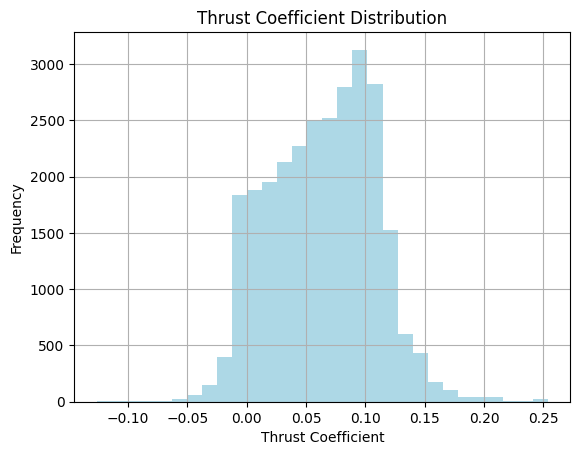

In [9]:
import matplotlib.pyplot as plt  # Make sure to import this

# Plot histogram for thrust coefficient or another numerical column
merged_df['ct'].hist(bins=30, color='lightblue')
plt.title('Thrust Coefficient Distribution')
plt.xlabel('Thrust Coefficient')
plt.ylabel('Frequency')
plt.show()


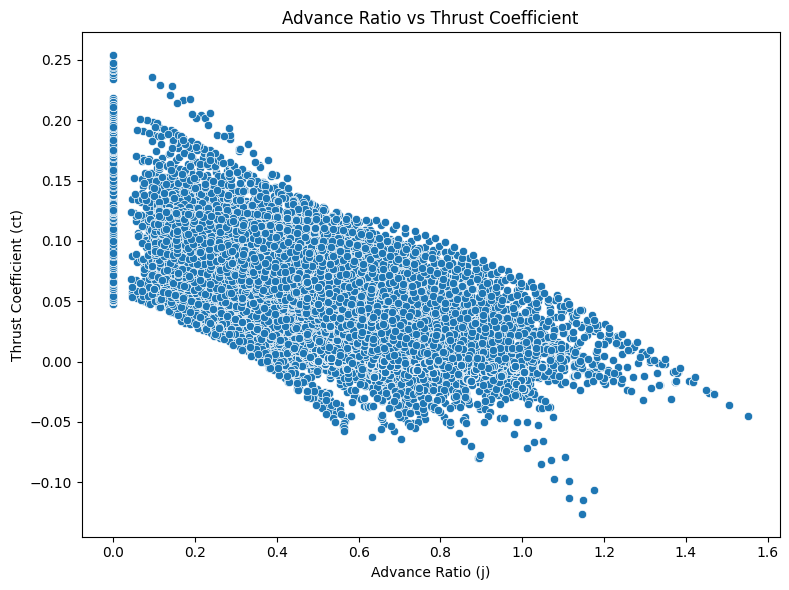

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of Advance Ratio vs Thrust Coefficient
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='j', y='ct')
plt.title('Advance Ratio vs Thrust Coefficient')
plt.xlabel('Advance Ratio (j)')
plt.ylabel('Thrust Coefficient (ct)')
plt.tight_layout()
plt.show()


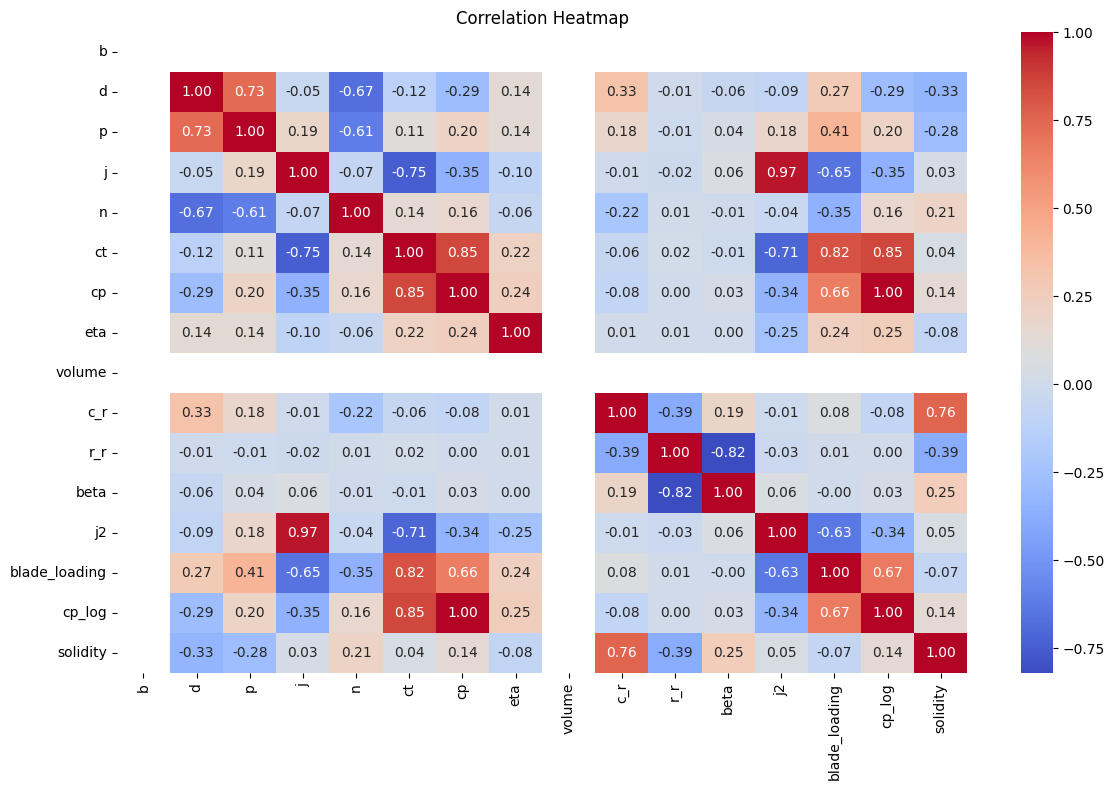

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


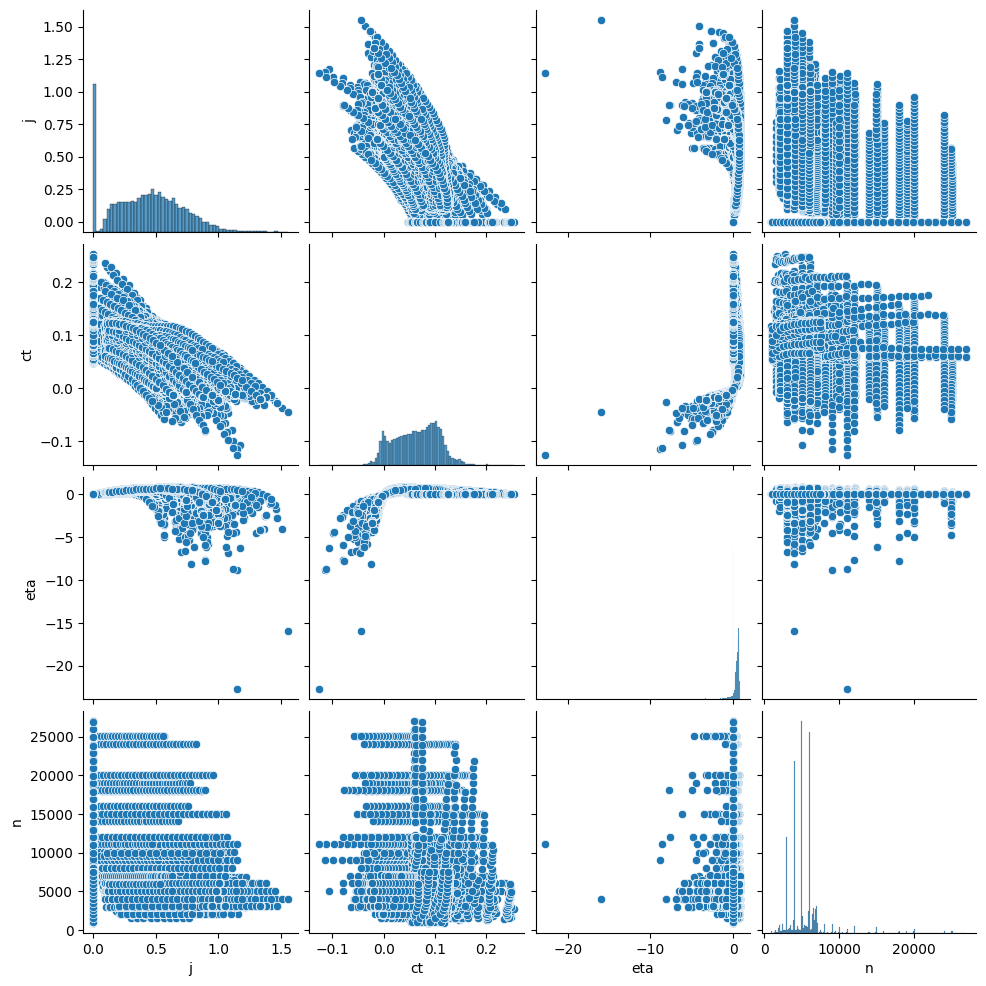

In [14]:
# Pair plot for a subset of columns (example with 'j', 'ct', 'eta', 'n')
sns.pairplot(merged_df[['j', 'ct', 'eta', 'n']])
plt.show()


In [18]:
# Check the first few rows of the dataframe
print(merged_df.head())

# Check the data types of the columns
print(merged_df.dtypes)

# Check the unique values of 'ct' (ensure it's categorical if you're plotting by category)
print(merged_df['ct'].unique())


           propname     bladename  family  b    d    p      j       n      ct  \
0  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.165  4000.0  0.0993   
1  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.214  4000.0  0.0947   
2  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.255  4000.0  0.0916   
3  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.301  4000.0  0.0847   
4  ance 8.5x6.0 - 2  ance 8.5x6.0    ance  2  8.5  6.0  0.340  4000.0  0.0796   

       cp  ...        bladename   family    d    p    c/r   r/r   beta  \
0  0.0539  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.160  0.15  31.68   
1  0.0543  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.146  0.20  34.45   
2  0.0548  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.144  0.25  35.93   
3  0.0540  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.30  33.33   
4  0.0530  ...  apc29ff 9.0x5.0  apc29ff  9.0  5.0  0.143  0.35  29.42   

   volume  test_type  thrust_unit  
0     1.0     normal            

In [23]:
# 1.a) See exactly what columns you have:
print("Columns in merged_df:\n", merged_df.columns.tolist())

# 1.b) If you haven’t yet, normalize them to lowercase & underscores:
merged_df.columns = (
    merged_df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[()]", "", regex=True)
)
print("Normalized columns:\n", merged_df.columns.tolist())


Columns in merged_df:
 ['propname', 'bladename', 'family', 'b', 'd', 'p', 'j', 'n', 'ct', 'cp', 'eta', 'volume', 'bladename', 'family', 'd', 'p', 'c/r', 'r/r', 'beta', 'volume', 'test_type', 'thrust_unit']
Normalized columns:
 ['propname', 'bladename', 'family', 'b', 'd', 'p', 'j', 'n', 'ct', 'cp', 'eta', 'volume', 'bladename', 'family', 'd', 'p', 'c/r', 'r/r', 'beta', 'volume', 'test_type', 'thrust_unit']


In [24]:
import numpy as np

# Blade loading: thrust per rev/sec
if {'thrust', 'rpm'}.issubset(merged_df.columns):
    merged_df['blade_loading'] = merged_df['thrust'] / (merged_df['rpm'] + 1e-6)
else:
    print("⚠️ Skipping blade_loading: 'thrust' or 'rpm' not found.")

# Power coefficient: Cp = power / (ρ * D^5 * n^3)
if {'power', 'rho', 'd', 'n'}.issubset(merged_df.columns):
    merged_df['power_coefficient'] = (
        merged_df['power'] /
        (merged_df['rho'] * merged_df['d']**5 * merged_df['n']**3 + 1e-12)
    )
else:
    print("⚠️ Skipping power_coefficient: missing one of power, rho, d, n.")

# Solidity: num_blades * chord / (π * D)
if {'num_blades','chord','d'}.issubset(merged_df.columns):
    merged_df['solidity'] = (
        merged_df['num_blades'] * merged_df['chord'] /
        (np.pi * merged_df['d'] + 1e-6)
    )
else:
    print("⚠️ Skipping solidity: missing num_blades, chord, or d.")

# Advance ratio squared
if 'j' in merged_df.columns:
    merged_df['j2'] = merged_df['j']**2
else:
    print("⚠️ Skipping j2: 'j' not found.")


⚠️ Skipping blade_loading: 'thrust' or 'rpm' not found.
⚠️ Skipping power_coefficient: missing one of power, rho, d, n.
⚠️ Skipping solidity: missing num_blades, chord, or d.


In [26]:
# Ensure ct and n are real numbers, not categories
for col in ['ct','n']:
    if col in merged_df.columns:
        # if it's categorical or object, convert:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


In [27]:
import numpy as np

# (Re-normalize and dedupe columns as before…)
merged_df.columns = (
    merged_df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[()]", "", regex=True)
)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
merged_df = merged_df.rename(columns={'c/r':'c_r','r/r':'r_r'})

# 1) Coerce your key predictors to numeric
for col in ['ct','n']:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# 2) Create features only if the needed columns now exist and are numeric
features = []
if {'ct','n'}.issubset(merged_df.columns):
    merged_df['blade_loading'] = merged_df['ct'] / (merged_df['n'] + 1e-6)
    features.append('blade_loading')

if 'cp' in merged_df.columns:
    merged_df['cp_log'] = np.log1p(merged_df['cp'])
    features.append('cp_log')

if 'j' in merged_df.columns:
    merged_df['j2'] = merged_df['j']**2
    features.append('j2')

if {'c_r','b','d'}.issubset(merged_df.columns):
    merged_df['solidity'] = merged_df['c_r'] * merged_df['b'] / (np.pi * merged_df['d'] + 1e-6)
    features.append('solidity')

print("🔧 Created features:", features)

# 3) Drop any rows still missing new features
merged_df = merged_df.dropna(subset=features)
print("▶️ Shape after dropna:", merged_df.shape)


🔧 Created features: ['blade_loading', 'cp_log', 'j2', 'solidity']
▶️ Shape after dropna: (2316, 21)


In [28]:
from sklearn.model_selection import train_test_split

# Select the features you created plus any legacy predictors you want:
predictors = ['blade_loading', 'cp_log', 'j2']
X = merged_df[predictors]

# Choose your target—e.g., thrust coefficient 'ct'
y = merged_df['ct']

# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:    ", X_test.shape)


Training set size: (1852, 3)
Test set size:     (464, 3)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate
models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'GBR': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Fit each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


LinearRegression trained.
SVR trained.
GBR trained.


In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'model': name,
        'R2': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

import pandas as pd
print(pd.DataFrame(results))


              model        R2       MAE      RMSE
0  LinearRegression  0.939340  0.007123  0.009302
1               SVR -0.000406  0.032141  0.037777
2               GBR  0.987169  0.003286  0.004278


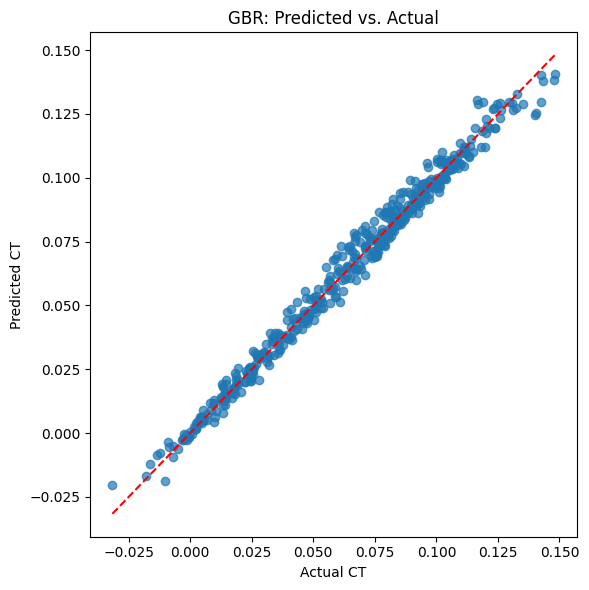

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, models['GBR'].predict(X_test), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CT")
plt.ylabel("Predicted CT")
plt.title("GBR: Predicted vs. Actual")
plt.tight_layout()
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# SVR parameter grid
svr_param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.01, 0.1, 0.2]
}

# Gradient Boosting parameter grid
gbr_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1.0],
    'min_samples_split': [2, 5]
}


In [34]:
# Assuming X_train, y_train already defined
svr = SVR()
svr_grid = GridSearchCV(
    svr,
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)


In [35]:
from scipy.stats import uniform, randint

# Alternatively, define distributions for RandomizedSearch
gbr_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(2, 8),
    'subsample': uniform(0.6, 0.4),
    'min_samples_split': randint(2, 10)
}

gbr = GradientBoostingRegressor(random_state=42)
gbr_rand = RandomizedSearchCV(
    gbr,
    param_distributions=gbr_param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)


In [39]:
# Fit SVR grid
svr_grid.fit(X_train, y_train)
print("Best SVR params:", svr_grid.best_params_)
print("Best SVR CV MSE:", -svr_grid.best_score_)

# Fit GBR randomized
gbr_rand.fit(X_train, y_train)
print("Best GBR params:", gbr_rand.best_params_)
print("Best GBR CV MSE:", -gbr_rand.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best SVR params: {'C': 10, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVR CV MSE: 3.394885147364422e-05
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best GBR params: {'learning_rate': np.float64(0.09955663291461833), 'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 296, 'subsample': np.float64(0.8688542189623514)}
Best GBR CV MSE: 8.856035780409361e-06


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# SVR tuned
svr_best = svr_grid.best_estimator_
y_pred_svr = svr_best.predict(X_test)

# GBR tuned
gbr_best = gbr_rand.best_estimator_
y_pred_gbr = gbr_best.predict(X_test)

# Metrics
for name, y_pred in [('SVR', y_pred_svr), ('GBR', y_pred_gbr)]:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test MSE: {mse:.4f}, R²: {r2:.4f}")


SVR Test MSE: 0.0000, R²: 0.9728
GBR Test MSE: 0.0000, R²: 0.9930


In [41]:
# Combine train + test back together
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

# Retrain
final_model = gbr_best  # or svr_best, whichever performed best
final_model.fit(X_full, y_full)


GradientBoostingRegressor(learning_rate=np.float64(0.09955663291461833),
                          max_depth=7, min_samples_split=9, n_estimators=296,
                          random_state=42,
                          subsample=np.float64(0.8688542189623514))

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_full, y_full, cv=5, scoring='r2', n_jobs=-1)
print(f"Final CV R²: {scores.mean():.3f} ± {scores.std():.3f}")


Final CV R²: 0.994 ± 0.001


In [43]:
import pandas as pd

fi = pd.Series(final_model.feature_importances_, index=predictors).sort_values(ascending=False)
print("Feature importances:\n", fi)


Feature importances:
 blade_loading    0.754516
cp_log           0.158006
j2               0.087477
dtype: float64


 98%|===================| 2278/2316 [00:51<00:00]        

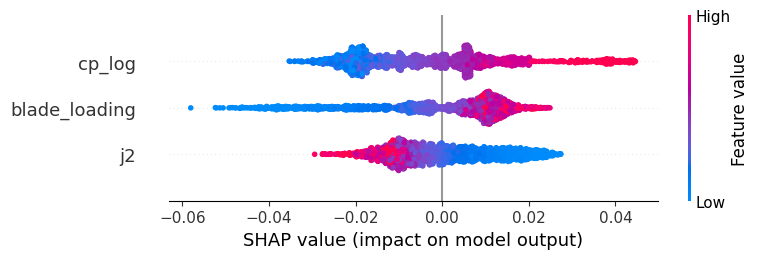

In [46]:
import shap

explainer = shap.Explainer(final_model, X_full)
shap_values = explainer(X_full)
shap.summary_plot(shap_values, X_full)


In [45]:
pip install --upgrade jupyter ipywidgets 

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 5.1 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.0 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [jupyterlab_widgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---

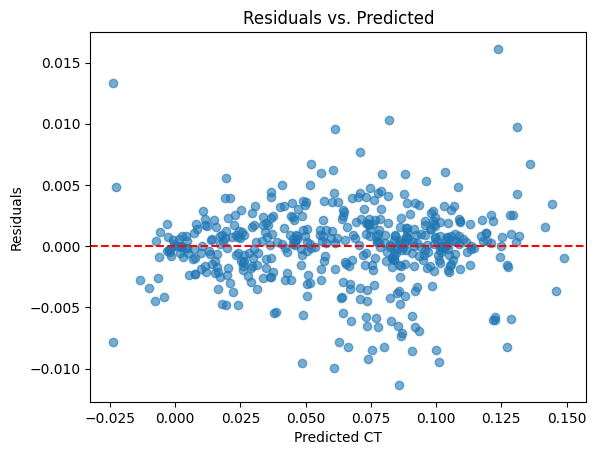

In [47]:
import matplotlib.pyplot as plt
res = y_test - y_pred
plt.scatter(y_pred, res, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted CT"); plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()


In [48]:
import joblib
joblib.dump(final_model, "gbr_propeller_model.pkl")


['gbr_propeller_model.pkl']

In [53]:
import joblib
import os

# Assuming your trained pipeline is stored in 'final_model'
model_directory = "models"
model_filename = "propeller_model_pipeline.pkl"

# Create the 'models' directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)

# Save the model pipeline
joblib.dump(final_model, os.path.join(model_directory, model_filename))

print(f"Model pipeline saved at: {os.path.join(model_directory, model_filename)}")


Model pipeline saved at: models\propeller_model_pipeline.pkl


In [50]:
pip install fastapi


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/2.0 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.9 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [pydantic-core]
   -------------------- ------------------- 3/6 [starlette]
   -------------------- ------------------- 3/6 [starlette]
   -------------------- ------------------- 3/6 [starlette]
   -------------------- ------------------- 3/6 [starlette]
   -------------------- ------------------- 3/6 [starlette]
   -------------------- ------------------- 3/6 [starlette]
   -------------------------- ------------- 4/6 [pydantic]
   -------------------------- ------------- 4/6 [pydantic]
   -------------------------- ------------- 4/6 [pydantic]
   --------------------

In [1]:
import os
os.getcwd()


'C:\\Users\\91939'